# RNN for Image Classification
(On MNIST Dataset)

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

## ::::: Section 01 Importing Data :::::

### -|- Importing the data -|-

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape:", x_train.shape) # Printing the shape of x

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


## ::::: Section 2 Building and Training the LSTM model for image classification :::::

### -|- Building the model -|-

In [3]:
input = Input(shape=x_train[0].shape) # input shape of individual image
x = LSTM(128)(input)
x = Dense(10, activation='softmax')(x) # for 10 output units

model = Model(input, x)

### -|- Compiling and training the model -|-

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 41s 5ms/step - loss: 0.6371 - accuracy: 0.7858 - val_loss: 0.1436 - val_accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1142 - accuracy: 0.9651 - val_loss: 0.0914 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0770 - accuracy: 0.9758 - val_loss: 0.0747 - val_accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0576 - accuracy: 0.9820 - val_loss: 0.0545 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.0530 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0487 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0415 - val_accuracy

## ::::: Section 3 Plotting graphs :::::

### -|- Plotting the loss per iteration -|-

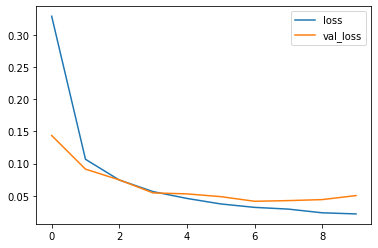

In [5]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### -|- Plotting the accuracy per iteration -|-

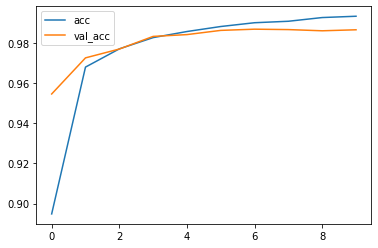

In [6]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## ::::: Section 4 Generating confusion matrix and Showing misclassified examples :::::

 ### -|- Generating confusion matrix -|-

Confusion matrix, without normalization
[[ 970    0    1    0    0    0    2    1    6    0]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   2    1 1023    0    1    0    1    3    1    0]
 [   0    0    5  993    0    5    0    1    5    1]
 [   0    0    1    0  968    0    4    2    1    6]
 [   2    1    0    5    0  872    2    0    5    5]
 [   4    5    1    0    1    2  944    0    1    0]
 [   1    4    5    2    0    0    0 1004    1   11]
 [   0    0    3    1    1    2    0    1  963    3]
 [   0    0    0    0    7    1    0    3    2  996]]


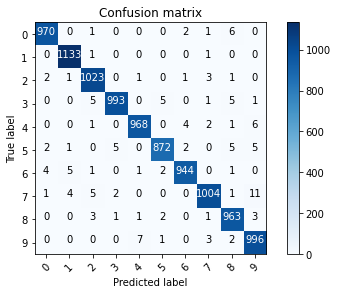

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

 ### -|- Showing misclassified examples -|-

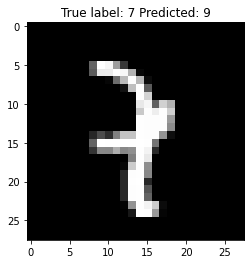

In [8]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)

plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));